In [8]:
import pandas as pd

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_filling.xlsx")  # Update with the actual file path
df = pd.read_excel(file_path)

# Print column names to verify
print("Available Columns in Dataset:")
print(df.columns)

# Drop all rows with missing values
df.dropna(inplace=True)

# Convert categorical variables (ensure column names match)
df['is_trp_active'] = df['is_trp_active'].map({'Y': 1, 'N': 0})
df['is_nil_return'] = df['is_nil_return'].map({'Y': 1, 'N': 0})
df['filing_time'] = df['filing_time'].map({'On time filer': 1, 'Late time filer': 0})
df['special_table'] = df['special_table'].map({'Compliant': 0, 'Not Compliant': 1})

# Encode 'filling_status' with correct categories
filing_status_mapping = {
    'Nil filer': 0,
    'Credit filer': 1,
    'Non filer': 2,
    'Payment filer': 3
}
df['filing_status'] = df['filing_status'].map(filing_status_mapping)

# Display cleaned dataset
print("Cleaned Dataset Head:")
print(df.head())

# Save the cleaned dataset
df.to_csv("C:/Users/user/Downloads/VAT_filling_1.csv", index=False)



Available Columns in Dataset:
Index(['pin_no', 'tax_payer_name', 'station_name', 'region', 'obligation_name',
       'trp_no', 'return_from_dt', 'return_to_dt', 'filing_dt', 'return_type',
       'is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax',
       'filing_status', 'filing_time', 'special_table'],
      dtype='object')
Cleaned Dataset Head:
        pin_no               tax_payer_name station_name   region  \
0  A005483137Q           ROBIN NJUGUNA NJAU        Thika  CENTRAL   
1  P052034943W    EMY-P ENTERPRISES LIMITED        Thika  CENTRAL   
2  P051653966S  NEW SPARKS VILLA RESTAURANT        Thika  CENTRAL   
3  P051786975G          Ace Autofix Limited        Thika  CENTRAL   
4  P052080176W   FREWAMU GLOBAL COMPANY LTD        Thika  CENTRAL   

         obligation_name           trp_no return_from_dt return_to_dt  \
0  Value Added Tax (VAT)  KRA202306344311     2023-04-01   2023-04-30   
1  Value Added Tax (VAT)  KRA202307610410     2023-04-01   2023-04-30   
2  Value Ad


Summary Statistics:
       is_trp_active  is_nil_return     gross_tax       net_tax  \
count  136516.000000  136516.000000  1.365160e+05  1.365160e+05   
mean        0.993920       0.143280  1.023484e+05 -1.233240e+06   
std         0.077736       0.350359  5.124354e+06  3.250207e+07   
min         0.000000       0.000000 -1.171332e+09 -6.831729e+09   
25%         1.000000       0.000000  0.000000e+00 -8.211365e+04   
50%         1.000000       0.000000  0.000000e+00 -3.942875e+03   
75%         1.000000       0.000000  9.909005e+03  0.000000e+00   
max         1.000000       1.000000  6.593199e+08  5.410537e+08   

       filing_status    filing_time  special_table  
count  136516.000000  136516.000000  136516.000000  
mean        0.656040       0.988097       0.058264  
std         0.849194       0.108452       0.234243  
min         0.000000       0.000000       0.000000  
25%         0.000000       1.000000       0.000000  
50%         0.000000       1.000000       0.000000  
75% 

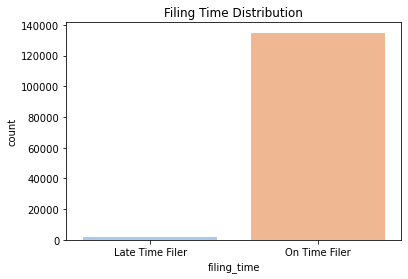

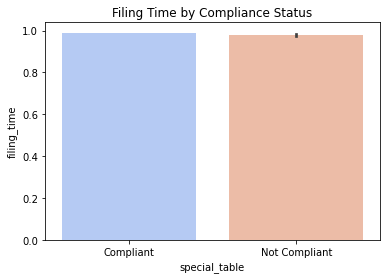

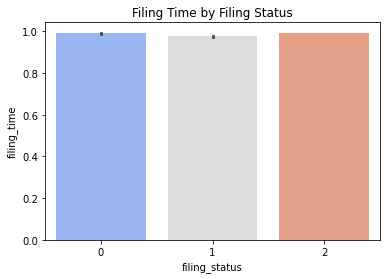

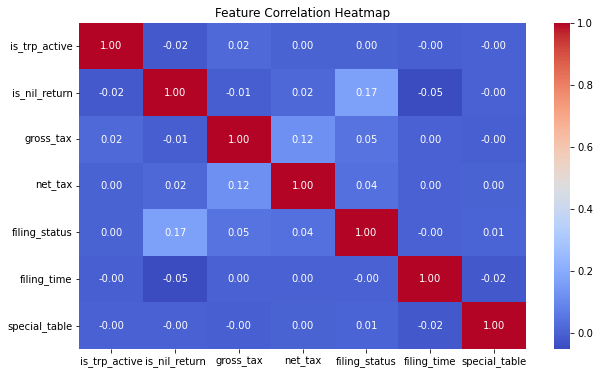

In [14]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_filling_1.csv" ) # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Keep only the specified columns
df = df[['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'filing_time', 'special_table']]

# Compute summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Plot the distribution of 'filing_time'
sns.countplot(x='filing_time', data=df, palette='pastel')
plt.title('Filing Time Distribution')
plt.xticks(ticks=[0, 1], labels=['Late Time Filer', 'On Time Filer'])
plt.show()

# Check filing time based on compliance status
sns.barplot(x='special_table', y='filing_time', data=df, palette='coolwarm')
plt.title('Filing Time by Compliance Status')
plt.xticks(ticks=[0, 1], labels=['Compliant', 'Not Compliant'])
plt.show()

# Check filing time based on filing status
sns.barplot(x='filing_status', y='filing_time', data=df, palette='coolwarm')
plt.title('Filing Time by Filing Status')
plt.show()

# Generate a correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_filling_1.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Select relevant features
features = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'filing_time', 'special_table']
df = df[features]

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['filing_status'], drop_first=True)

# Apply feature scaling to numerical variables
scaler = StandardScaler()
df[['gross_tax', 'net_tax']] = scaler.fit_transform(df[['gross_tax', 'net_tax']])

# Display processed dataset
print("\nProcessed dataset:")
print(df.head())



Processed dataset:
   is_trp_active  is_nil_return  gross_tax   net_tax  filing_time  \
0              1              1  -0.019973  0.037944            1   
1              1              0  -0.017622  0.038030            1   
2              1              0  -0.019973  0.037557            1   
3              1              0   0.310334  0.080342            1   
4              1              1  -0.019973  0.037944            1   

   special_table  filing_status_1  filing_status_2  
0              0                1                0  
1              0                0                1  
2              0                0                0  
3              0                0                1  
4              0                1                0  


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_filling_1.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Select relevant features
selected_features = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'special_table']
X = df[selected_features].copy()
y = df['filing_time'].copy()

# Convert categorical variables to numeric (one-hot encoding)
X = pd.get_dummies(X, columns=['filing_status'], drop_first=True)

# Apply feature scaling
scaler = StandardScaler()
X[['gross_tax', 'net_tax']] = scaler.fit_transform(X[['gross_tax', 'net_tax']])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(log_model.coef_, columns=X.columns)
print(coefficients)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model
print("\nModel Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))




Model Coefficients:
   is_trp_active  is_nil_return  gross_tax   net_tax  special_table  \
0      -0.182824      -0.653977  -0.000809 -0.009614      -0.654529   

   filing_status_1  filing_status_2  
0        -0.275496         0.214239  

Model Accuracy on Test Data: 0.9880969821271609

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       325
           1       0.99      1.00      0.99     26979

    accuracy                           0.99     27304
   macro avg       0.99      0.50      0.50     27304
weighted avg       0.99      0.99      0.98     27304




Model Coefficients:
   is_trp_active  is_nil_return  gross_tax   net_tax  special_table  \
0      -0.182824      -0.653977  -0.000809 -0.009614      -0.654529   

   filing_status_1  filing_status_2  
0        -0.275496         0.214239  

Model Accuracy on Test Data: 0.9880969821271609

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       325
           1       0.99      1.00      0.99     26979

    accuracy                           0.99     27304
   macro avg       0.99      0.50      0.50     27304
weighted avg       0.99      0.99      0.98     27304



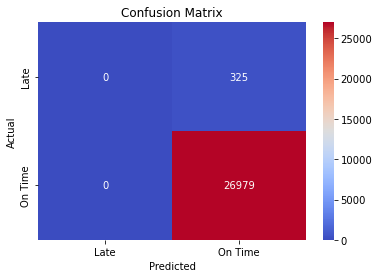

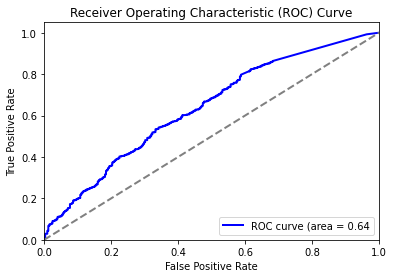

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
file_path = ("C:/Users/user/Downloads/VAT_filling_1.csv")  # Ensure the cleaned dataset exists
df = pd.read_csv(file_path)

# Select relevant features
selected_features = ['is_trp_active', 'is_nil_return', 'gross_tax', 'net_tax', 'filing_status', 'special_table']
X = df[selected_features].copy()
y = df['filing_time'].copy()

# Convert categorical variables to numeric (one-hot encoding)
X = pd.get_dummies(X, columns=['filing_status'], drop_first=True)

# Apply feature scaling
scaler = StandardScaler()
X[['gross_tax', 'net_tax']] = scaler.fit_transform(X[['gross_tax', 'net_tax']])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame(log_model.coef_, columns=X.columns)
print(coefficients)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model
print("\nModel Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Late', 'On Time'], yticklabels=['Late', 'On Time'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
